<a href="https://colab.research.google.com/github/uruenariobo/2024.2Modelos2-Estimation-of-obesity-levels/blob/main/Entregable_II_G_DB_1_ElianaPuertaMorales_JuanLoperaMu%C3%B1oz_MiguelUruenaRiobo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entregable 2: Obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico


## Miguel Ángel Urueña Riobo
## Juan Fernando Lopera Muñoz
## Eliana Janneth Puerta Morales



## Objetivo
El objetivo del proyecto es utilizar técnicas de clasificación para predecir el tipo de obesidad de personas en México, Perú y Colombia, basándose en sus hábitos alimenticios y su condición física. El conjunto de datos contiene 17 atributos y 2111 registros etiquetados con niveles de obesidad, que van desde peso insuficiente hasta obesidad tipo III.




## Preprocesamiento de datos

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 M

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
from pycaret.datasets import get_data

In [ ]:
from pycaret.classification import *

In [ ]:
df_original = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
df = df_original.copy()

In [ ]:
numerical_columns = df.select_dtypes(include=['number'])
x = numerical_columns.iloc[:,:8]
y = df['NObeyesdad']

In [ ]:
from collections import Counter
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({'Obesity_Type_I': 351, 'Obesity_Type_III': 324, 'Obesity_Type_II': 297, 'Overweight_Level_I': 290, 'Overweight_Level_II': 290, 'Normal_Weight': 287, 'Insufficient_Weight': 272})


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x, y)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler =  MinMaxScaler()
x_resampled = pd.DataFrame(scaler.fit_transform(x_resampled), columns=x_resampled.columns)

In [ ]:
df_resampled =  pd.concat([x_resampled, y_resampled], axis=1)

## Pycaret
Aclarar que solo se usó para usarse de referencia

In [ ]:
df_pycaret = df_resampled.sample(frac=0.8,random_state=0)

In [ ]:
df_pycaret_unseen=df_resampled.drop(df_pycaret.index)
df_pycaret_unseen

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
0,0.148936,0.320755,0.186567,0.500000,0.666667,0.500000,0.000000,0.500000,Normal_Weight
3,0.276596,0.660377,0.358209,1.000000,0.666667,0.500000,0.666667,0.000000,Overweight_Level_I
7,0.170213,0.358491,0.104478,0.500000,0.666667,0.500000,1.000000,0.000000,Normal_Weight
24,0.148936,0.754717,0.216418,0.500000,0.666667,0.500000,0.000000,0.500000,Normal_Weight
25,0.127660,0.283019,0.082090,0.500000,1.000000,0.500000,1.000000,1.000000,Normal_Weight
...,...,...,...,...,...,...,...,...,...
2430,0.170213,0.377358,0.305970,0.500000,0.666667,0.500000,1.000000,1.000000,Overweight_Level_II
2438,0.433823,0.455325,0.287773,1.000000,0.267435,0.500000,0.130292,0.000000,Overweight_Level_II
2444,0.372011,0.486062,0.325275,0.897543,0.750156,0.183938,0.007653,0.000000,Overweight_Level_II
2445,0.120955,0.472881,0.291405,0.326541,0.584473,0.596032,0.491646,0.259271,Overweight_Level_II


In [ ]:
df_pycaret.reset_index(inplace=True, drop=True)
df_pycaret_unseen.reset_index(inplace=True, drop=True)
print(df_pycaret.shape)
print(df_pycaret_unseen.shape)

(1966, 9)
(491, 9)


In [ ]:
model_setup=setup(data=df_pycaret, session_id=0)

,Description,Value
0,Session id,0
1,Target,NObeyesdad
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(1966, 9)"
5,Transformed data shape,"(1966, 9)"
6,Transformed train set shape,"(1376, 9)"
7,Transformed test set shape,"(590, 9)"
8,Numeric features,8
9,Preprocess,True


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9666,0.0000,0.9666,0.9685,0.9663,0.9610,0.9614,5.6240
xgboost,Extreme Gradient Boosting,0.9615,0.0000,0.9615,0.9632,0.9613,0.9551,0.9554,0.2870
gbc,Gradient Boosting Classifier,0.9528,0.0000,0.9528,0.9547,0.9527,0.9449,0.9452,2.3480
rf,Random Forest Classifier,0.9418,0.0000,0.9418,0.9461,0.9421,0.9321,0.9329,0.4310
et,Extra Trees Classifier,0.9404,0.0000,0.9404,0.9426,0.9404,0.9305,0.9308,0.2210
dt,Decision Tree Classifier,0.9200,0.0000,0.9200,0.9232,0.9194,0.9067,0.9074,0.0410
qda,Quadratic Discriminant Analysis,0.8808,0.0000,0.8808,0.8991,0.8676,0.8609,0.8688,0.0410
lda,Linear Discriminant Analysis,0.8692,0.0000,0.8692,0.8822,0.8697,0.8474,0.8494,0.0400
knn,K Neighbors Classifier,0.7078,0.0000,0.7078,0.7079,0.7006,0.6591,0.6615,0.0540
lr,Logistic Regression,0.6490,0.0000,0.6490,0.6334,0.6293,0.5904,0.5943,0.8350


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9420,0.0000,0.9420,0.9422,0.9414,0.9324,0.9326
1,0.9420,0.0000,0.9420,0.9436,0.9417,0.9324,0.9327
2,0.9565,0.0000,0.9565,0.9581,0.9562,0.9493,0.9497
3,0.9783,0.0000,0.9783,0.9811,0.9787,0.9746,0.9750
4,0.9565,0.0000,0.9565,0.9584,0.9568,0.9493,0.9495
5,0.8986,0.0000,0.8986,0.9003,0.8978,0.8816,0.8821
6,0.9562,0.0000,0.9562,0.9585,0.9567,0.9489,0.9491
7,0.9489,0.0000,0.9489,0.9495,0.9485,0.9404,0.9406
8,0.9416,0.0000,0.9416,0.9428,0.9417,0.9319,0.9320


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


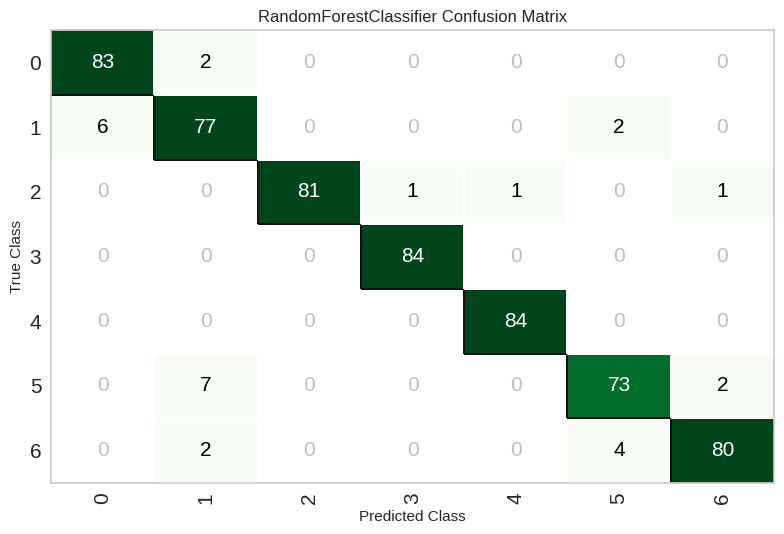

In [ ]:
plot_model(rf, plot = 'confusion_matrix')

In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7464,0.0000,0.7464,0.7441,0.7334,0.7039,0.7079
1,0.7174,0.0000,0.7174,0.7156,0.7082,0.6703,0.6732
2,0.6739,0.0000,0.6739,0.6875,0.6776,0.6195,0.6206
3,0.6957,0.0000,0.6957,0.6860,0.6803,0.6448,0.6483
4,0.7174,0.0000,0.7174,0.7239,0.7077,0.6702,0.6749
5,0.7319,0.0000,0.7319,0.7234,0.7210,0.6872,0.6892
6,0.6861,0.0000,0.6861,0.6917,0.6808,0.6339,0.6361
7,0.7372,0.0000,0.7372,0.7347,0.7342,0.6934,0.6940
8,0.7445,0.0000,0.7445,0.7621,0.7491,0.7018,0.7033


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


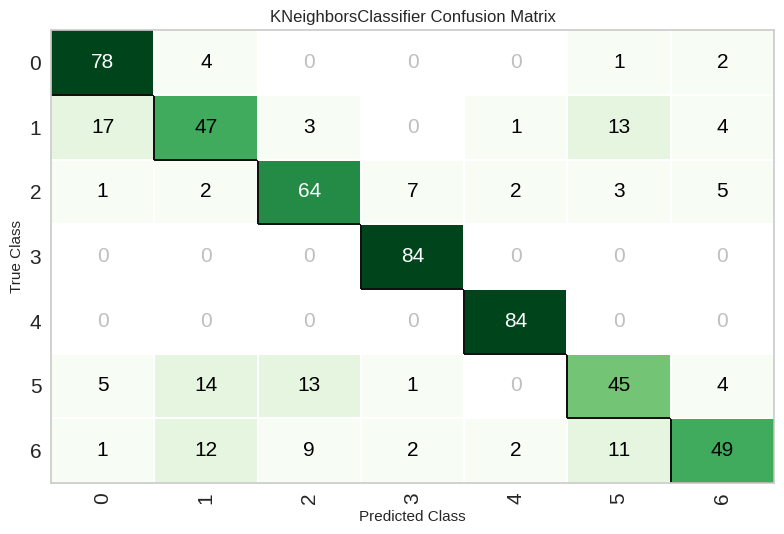

In [ ]:
plot_model(knn, plot = 'confusion_matrix')

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9420,0.0000,0.9420,0.9408,0.9406,0.9323,0.9326
1,0.9275,0.0000,0.9275,0.9299,0.9278,0.9155,0.9158
2,0.9420,0.0000,0.9420,0.9451,0.9423,0.9324,0.9328
3,0.9203,0.0000,0.9203,0.9291,0.9215,0.9070,0.9084
4,0.9783,0.0000,0.9783,0.9790,0.9783,0.9746,0.9748
5,0.8841,0.0000,0.8841,0.8904,0.8825,0.8648,0.8664
6,0.9124,0.0000,0.9124,0.9162,0.9109,0.8978,0.8989
7,0.9124,0.0000,0.9124,0.9129,0.9118,0.8978,0.8981
8,0.8978,0.0000,0.8978,0.9029,0.8971,0.8808,0.8821


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=0, splitter='best')


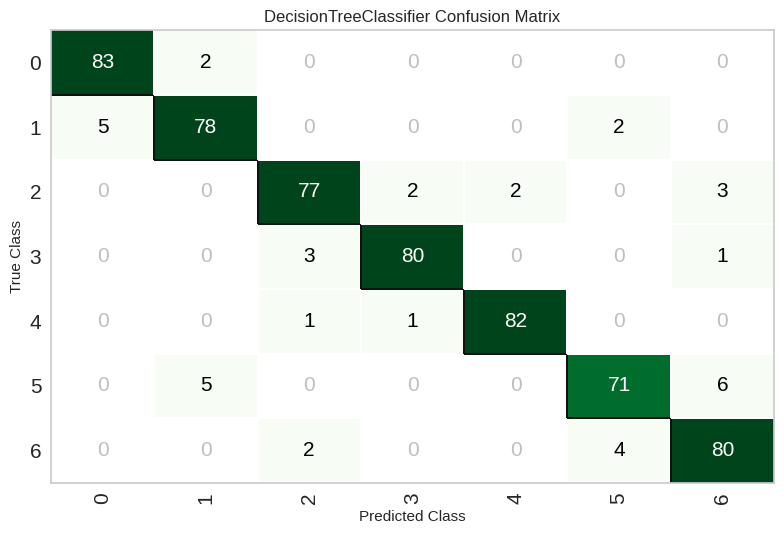

In [ ]:
plot_model(dt, plot = 'confusion_matrix')

## Modelado

In [ ]:
x = df_resampled.iloc[:,:8]
y = df_resampled['NObeyesdad']

In [ ]:
def muestras_por_clases(Y):
    dicto = dict(zip(np.unique(Y,return_counts=True)[0], np.unique(Y,return_counts=True)[1]))
    return (dicto)

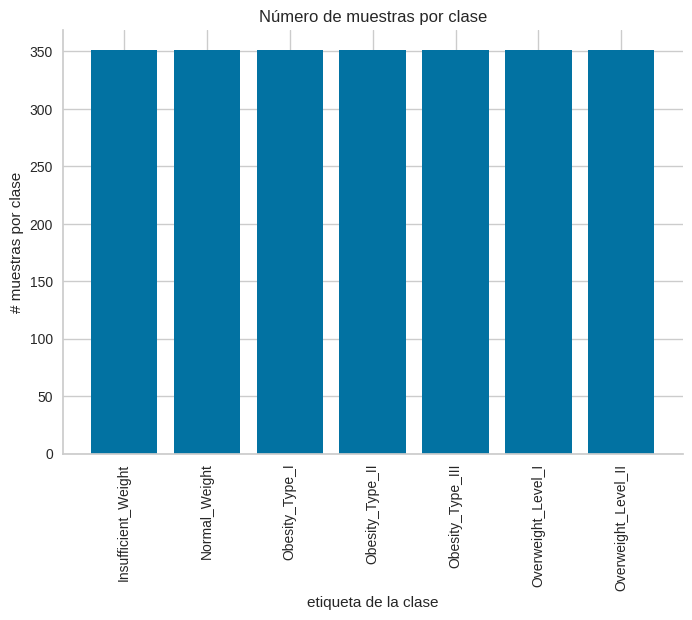

In [ ]:
fig, ax = plt.subplots()
ax.bar(muestras_por_clases(y).keys(), muestras_por_clases(y).values())
ax.set_title("Número de muestras por clase")
ax.set_xlabel("etiqueta de la clase")
ax.set_ylabel("# muestras por clase")
ax.set_xticks(list(muestras_por_clases(y).keys()))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### StratiedKFold


In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10,15,20],
    'min_samples_leaf': [5, 10,15,20],
    'max_features': ['sqrt']
}
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=skf, scoring='accuracy')
grid_search.fit(x, y)
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 150}


In [ ]:
accuracy_scores_rf = []
precision_scores_rf = []
recall_scores_rf = []
f1_scores_rf = []
cf_rf=[]
rf_model = RandomForestClassifier(random_state=0, max_depth= None, max_features= 'sqrt', min_samples_leaf= 5, min_samples_split= 5, n_estimators=100)

In [ ]:
for train_index, test_index in skf.split(x, y):
    x = np.array(x)
    X_train = x[train_index,:]
    y_train = y[train_index]
    X_test = x[test_index,:]
    y_test = y[test_index]
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    conf_matrix_rf = confusion_matrix(y_test, y_pred)
    accuracy_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred, average='macro')
    recall_test = recall_score(y_test, y_pred, average='macro')
    f1_test = f1_score(y_test, y_pred, average='macro')
    accuracy_scores_rf.append(accuracy_test)
    precision_scores_rf.append(precision_test)
    recall_scores_rf.append(recall_test)
    f1_scores_rf.append(f1_test)
    cf_rf.append(conf_matrix_rf)

In [ ]:
print("Accuracy promedio:", np.mean(accuracy_scores_rf))
print("Precision promedio:", np.mean(precision_scores_rf))
print("Recall promedio:", np.mean(recall_scores_rf))
print("F1-score promedio:", np.mean(f1_scores_rf))

Accuracy promedio: 0.9536021237763398
Precision promedio: 0.9552727063040531
Recall promedio: 0.9536167800453516
F1-score promedio: 0.9537075418547472


In [ ]:
rf_results =  pd.DataFrame({
    "accuracy":accuracy_scores_rf,
    "Precision":precision_scores_rf,
    "Recall":recall_scores_rf,
    "F1-score": f1_scores_rf
})
rf_results

,accuracy,Precision,Recall,F1-score
0,0.955285,0.956353,0.955442,0.955748
1,0.951220,0.953849,0.951587,0.951788
2,0.955285,0.956026,0.955329,0.954720
3,0.955285,0.956660,0.955442,0.955354
4,0.951220,0.952970,0.951020,0.950906
5,0.963415,0.963946,0.963265,0.963374
6,0.943089,0.944799,0.942857,0.943243
7,0.959184,0.961939,0.959184,0.959518
8,0.942857,0.944188,0.942857,0.942736
9,0.959184,0.961998,0.959184,0.959688


In [ ]:
for matriz in cf_rf:
    print("Matriz:")
    print(matriz)
    print()

Matriz:
[[34  1  0  0  0  0  0]
 [ 1 33  0  0  0  1  1]
 [ 0  1 34  0  0  0  0]
 [ 0  0  0 35  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  3  0  0  0 31  1]
 [ 0  0  0  0  0  2 33]]

Matriz:
[[34  1  0  0  0  0  0]
 [ 1 33  0  0  0  1  0]
 [ 0  0 35  0  0  0  0]
 [ 0  0  0 35  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  4  0  0  0 31  1]
 [ 0  2  0  0  0  2 31]]

Matriz:
[[35  0  0  0  0  0  0]
 [ 0 33  0  0  0  1  1]
 [ 0  0 35  0  0  0  0]
 [ 0  0  0 35  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  4  0  0  0 28  3]
 [ 0  0  1  0  0  1 34]]

Matriz:
[[35  0  0  0  0  0  0]
 [ 0 33  0  0  0  2  0]
 [ 0  0 33  2  0  0  1]
 [ 0  0  0 35  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  3  0  0  0 31  1]
 [ 0  2  0  0  0  0 33]]

Matriz:
[[36  0  0  0  0  0  0]
 [ 2 32  0  0  0  1  0]
 [ 0  0 34  0  0  0  1]
 [ 0  0  0 35  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  3  0  0  0 29  3]
 [ 0  2  0  0  0  0 33]]

Matriz:
[[34  1  0  0  0  0  0]
 [ 0 34  0  0  0  1  0]
 [ 0  0 33  0  1  0  1]
 [ 0  0  0 36  0  0  0]
 [ 0  

## Decission Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid_dt = {
    'max_depth': [None, 10, 20,50],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 15, 20],
    'criterion':["gini", "entropy", "log_loss"]
}
dt_model = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=skf, scoring='accuracy')
grid_search_dt.fit(x, y)
print("Mejores parámetros:", grid_search_dt.best_params_)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [ ]:
dt_model = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split= 5, criterion='log_loss')
accuracy_scores_dt = []
precision_scores_dt = []
recall_scores_dt = []
f1_scores_dt = []
cf_dt = []

In [ ]:
for train_index, test_index in skf.split(x, y):
    x = np.array(x)
    X_train = x[train_index,:]
    y_train = y[train_index]
    X_test = x[test_index,:]
    y_test = y[test_index]
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    conf_matrix_dt = confusion_matrix(y_test, y_pred)
    accuracy_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred, average='macro')
    recall_test = recall_score(y_test, y_pred, average='macro')
    f1_test = f1_score(y_test, y_pred, average='macro')
    accuracy_scores_dt.append(accuracy_test)
    precision_scores_dt.append(precision_test)
    recall_scores_dt.append(recall_test)
    f1_scores_dt.append(f1_test)
    cf_dt.append(conf_matrix_dt)

In [ ]:
print("Accuracy promedio:", np.mean(accuracy_scores_dt))
print("Precision promedio:", np.mean(precision_scores_dt))
print("Recall promedio:", np.mean(recall_scores_dt))
print("F1-score promedio:", np.mean(f1_scores_dt))

Accuracy promedio: 0.9442558486809359
Precision promedio: 0.945372529256819
Recall promedio: 0.9441950113378687
F1-score promedio: 0.9440839400578476


In [ ]:
dt_results =  pd.DataFrame({
    "accuracy":accuracy_scores_dt,
    "Precision":precision_scores_dt,
    "Recall":recall_scores_dt,
    "F1-score": f1_scores_dt
})
dt_results

,accuracy,Precision,Recall,F1-score
0,0.951220,0.952286,0.951020,0.950895
1,0.930894,0.932832,0.930952,0.931468
2,0.951220,0.952095,0.951134,0.950735
3,0.902439,0.905322,0.902721,0.902365
4,0.947154,0.948756,0.946939,0.947068
5,0.943089,0.944605,0.942857,0.942270
6,0.947154,0.947000,0.946939,0.946752
7,0.967347,0.967447,0.967347,0.967284
8,0.955102,0.956048,0.955102,0.955080
9,0.946939,0.947334,0.946939,0.946923


In [ ]:
for matriz in cf_dt:
    print("Matriz:")
    print(matriz)
    print()

Matriz:
[[33  2  0  0  0  0  0]
 [ 0 36  0  0  0  0  0]
 [ 0  0 33  0  2  0  0]
 [ 0  0  0 35  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  1  0  0  0 32  2]
 [ 0  0  1  0  0  4 30]]

Matriz:
[[34  1  0  0  0  0  0]
 [ 1 32  0  0  0  2  0]
 [ 0  0 31  0  0  1  3]
 [ 0  0  1 33  0  0  1]
 [ 0  0  0  0 35  0  0]
 [ 0  3  0  0  0 33  0]
 [ 0  1  1  0  0  2 31]]

Matriz:
[[35  0  0  0  0  0  0]
 [ 1 33  0  0  0  1  0]
 [ 0  0 33  2  0  0  0]
 [ 0  0  0 34  1  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  2  0  0  0 29  4]
 [ 0  0  0  0  0  1 35]]

Matriz:
[[35  0  0  0  0  0  0]
 [ 3 30  0  0  0  2  0]
 [ 0  0 31  4  0  0  1]
 [ 0  0  2 33  0  0  0]
 [ 0  0  0  2 33  0  0]
 [ 0  2  0  0  0 29  4]
 [ 0  0  0  0  0  3 32]]

Matriz:
[[36  0  0  0  0  0  0]
 [ 2 32  0  0  0  1  0]
 [ 0  0 34  0  0  0  1]
 [ 0  0  0 35  0  0  0]
 [ 0  0  0  3 32  0  0]
 [ 0  3  0  0  0 32  0]
 [ 0  0  0  0  0  3 32]]

Matriz:
[[34  1  0  0  0  0  0]
 [ 1 32  0  0  0  2  0]
 [ 0  0 29  2  2  0  2]
 [ 0  0  0 36  0  0  0]
 [ 0  

In [ ]:
from sklearn import tree

ccp_alpha = 0.0


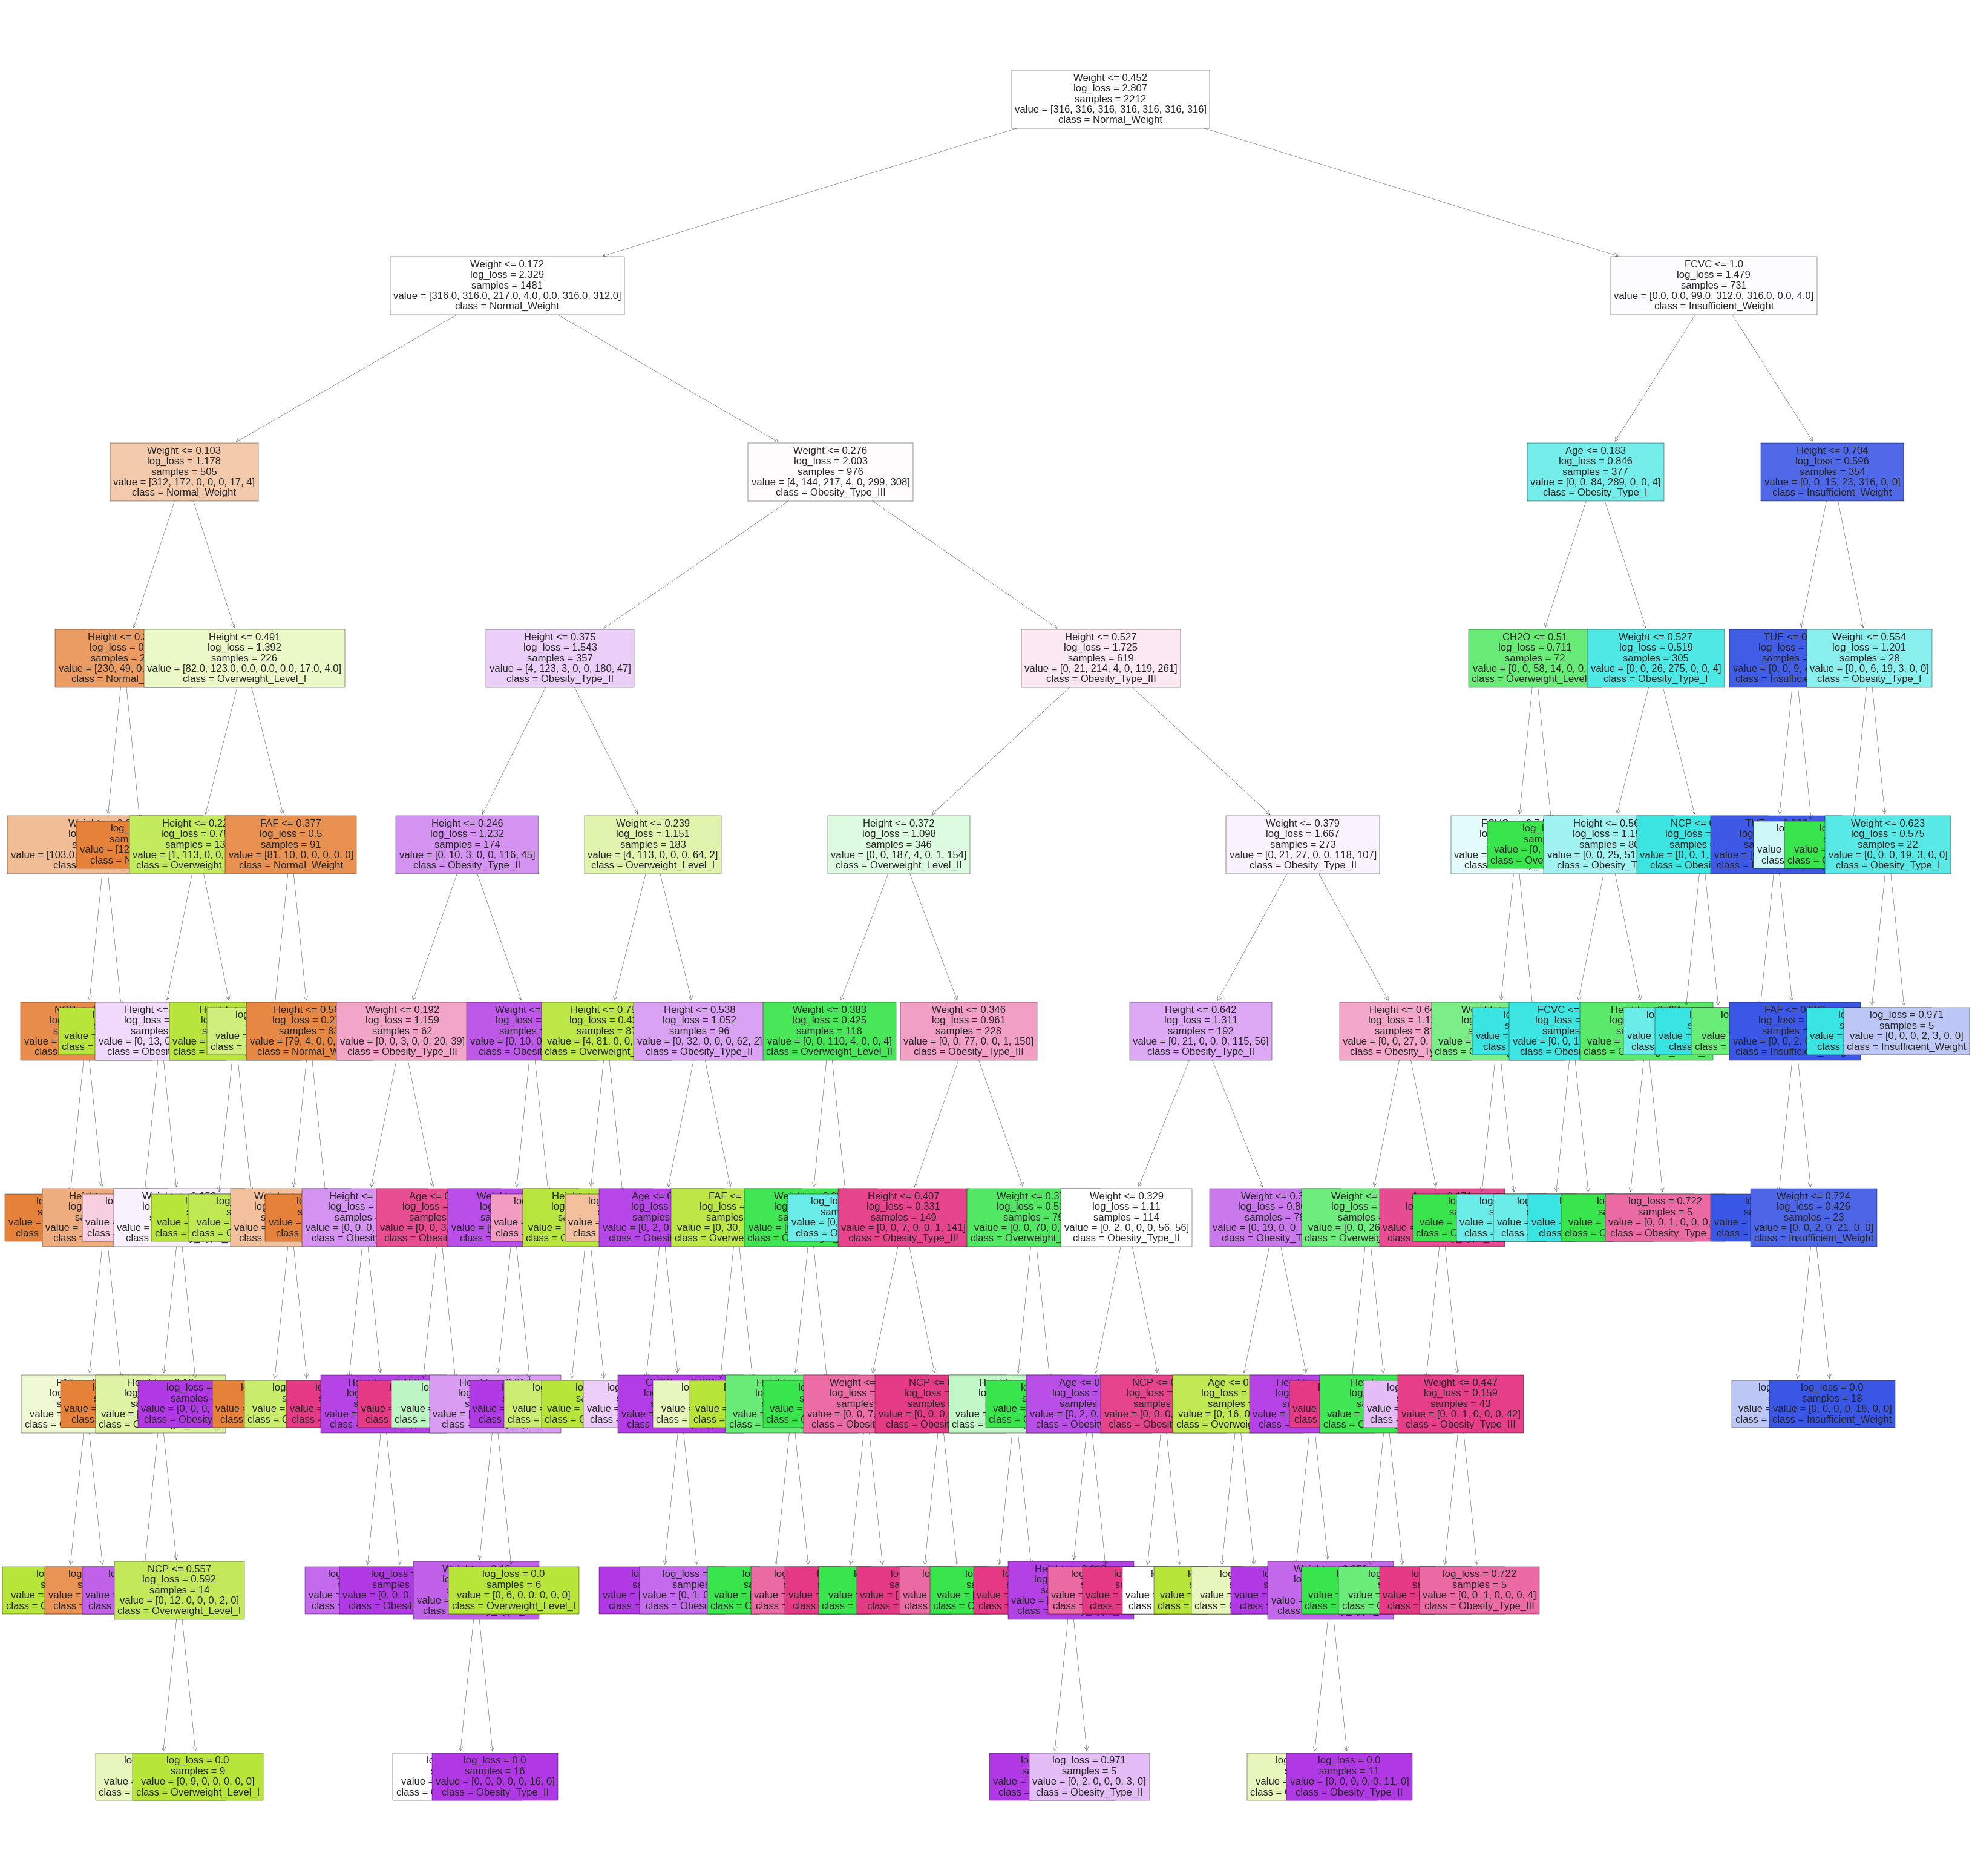

In [ ]:
plt.figure(figsize=(40, 40))
tree.plot_tree(dt_model,filled = True,class_names = y.unique(), feature_names= df_resampled.columns.tolist(),fontsize=12)
print("ccp_alpha = 0.0")
plt.show()

## K Neighbors nearest

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid_knn = {
    'n_neighbors':np.arange(5, 30),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn_model = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=skf, scoring='accuracy')
grid_search_knn.fit(x, y)
print("Mejores parámetros para KNeighborsClassifier:", grid_search_knn.best_params_)

Mejores parámetros para KNeighborsClassifier: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, p=1, weights='distance')
accuracy_scores_knn = []
precision_scores_knn = []
recall_scores_knn = []
f1_scores_knn = []
cf_knn = []

In [ ]:
for train_index, test_index in skf.split(x, y):
    x = np.array(x)
    X_train = x[train_index,:]
    y_train = y[train_index]
    X_test = x[test_index,:]
    y_test = y[test_index]
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix_knn = confusion_matrix(y_test, y_pred)
    accuracy_scores_knn.append(accuracy)
    precision_scores_knn.append(precision)
    recall_scores_knn.append(recall)
    f1_scores_knn.append(f1)
    cf_knn.append(conf_matrix_knn)

In [ ]:
print("Accuracy promedio:", np.mean(accuracy_scores_knn))
print("Precision promedio:", np.mean(precision_scores_knn))
print("Recall promedio:", np.mean(recall_scores_knn))
print("F1-score promedio:", np.mean(f1_scores_knn))

Accuracy promedio: 0.8982611581217853
Precision promedio: 0.9000856733710114
Recall promedio: 0.898219954648526
F1-score promedio: 0.8979381575890031


In [ ]:
knn_results =  pd.DataFrame({
    "accuracy":accuracy_scores_knn,
    "Precision":precision_scores_knn,
    "Recall":recall_scores_knn,
    "F1-score": f1_scores_knn
})
knn_results

,accuracy,Precision,Recall,F1-score
0,0.894309,0.894216,0.894671,0.893785
1,0.910569,0.910797,0.910658,0.908884
2,0.902439,0.903439,0.902494,0.901964
3,0.882114,0.884139,0.881973,0.880298
4,0.898374,0.902019,0.898526,0.898884
5,0.894309,0.895642,0.893878,0.894040
6,0.878049,0.881568,0.877551,0.877403
7,0.910204,0.912760,0.910204,0.910954
8,0.914286,0.914554,0.914286,0.914148
9,0.897959,0.901723,0.897959,0.899021


In [ ]:
for matriz in cf_knn:
    print("Matriz:")
    print(matriz)
    print()

Matriz:
[[33  1  1  0  0  0  0]
 [ 3 29  0  0  0  4  0]
 [ 0  2 31  0  0  0  2]
 [ 0  0  0 35  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 2  4  0  0  0 26  3]
 [ 0  0  3  0  0  1 31]]

Matriz:
[[34  1  0  0  0  0  0]
 [ 4 28  0  0  1  2  0]
 [ 0  0 27  3  0  3  2]
 [ 0  0  0 35  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  2  1  0  0 32  1]
 [ 0  1  1  0  0  0 33]]

Matriz:
[[34  1  0  0  0  0  0]
 [ 0 27  2  0  0  1  5]
 [ 1  0 29  2  0  1  2]
 [ 0  0  0 35  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 1  4  0  0  0 30  0]
 [ 1  2  0  0  0  1 32]]

Matriz:
[[34  1  0  0  0  0  0]
 [ 2 24  1  1  0  1  6]
 [ 0  0 33  2  0  0  1]
 [ 0  0  0 35  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  8  0  0  0 25  2]
 [ 0  1  2  0  0  1 31]]

Matriz:
[[31  4  0  0  0  1  0]
 [ 0 29  1  0  0  3  2]
 [ 0  1 31  2  0  0  1]
 [ 0  0  0 35  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  0  0  0  0 32  3]
 [ 0  4  1  0  0  2 28]]

Matriz:
[[33  2  0  0  0  0  0]
 [ 2 30  1  0  0  2  0]
 [ 0  1 28  0  0  2  4]
 [ 0  0  0 36  0  0  0]
 [ 0  